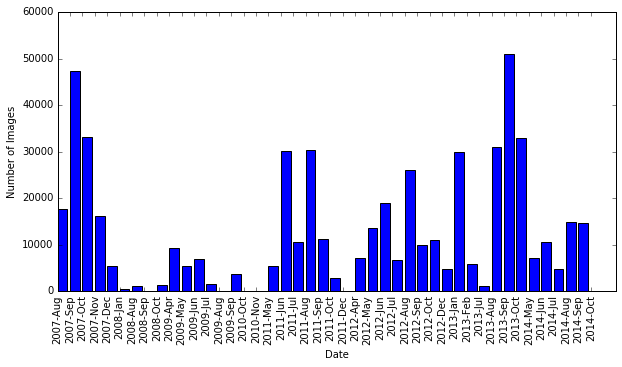

In [5]:
import os
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
plt.rcParams['figure.figsize']=(10,5)
    
csv_load_dir='/imagenetdb3/mysql_tmp_dir/'
#Number of ims over time
lines=open(os.path.join(csv_load_dir,'timelapse_num_ims.txt'),'rb').readlines()
img_save_dir='/imagenetdb/www/home/internal/stats'

date_list=[]
num_ims_list=[]

#By lowest time resolution
for l in lines:
    date_list.append(datetime.datetime.strptime(l.split('\t')[0],'%Y-%m-%d').strftime('%Y-%b'))
    num_ims_list.append(l.split('\t')[1].strip())
fig,ax=plt.subplots()
rects1 = ax.bar(xrange(len(date_list)),num_ims_list)
plt.ylabel('Number of Images')
plt.xlabel('Date')
plt.xticks(xrange(len(date_list)), date_list, 
          rotation='vertical')
plt.savefig(os.path.join(img_save_dir,'num_ims_date.png'))
plt.show() 


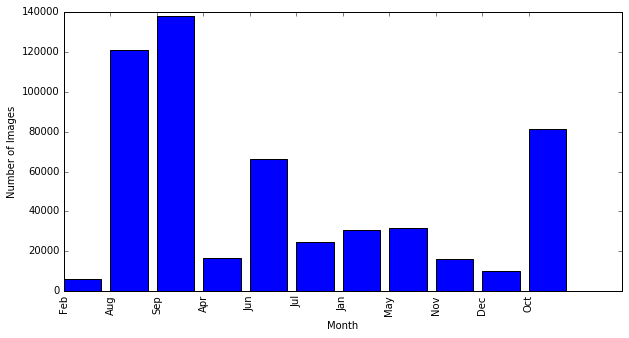

In [6]:
#Aggregate all years and plot by month
months_dict={}
for d,c in zip(date_list,num_ims_list):
    month=d.split('-')[1]
    if month in months_dict:
        months_dict[month] += int(c)
    else:
        months_dict[month]=int(c)
plt.rcParams['figure.figsize']=(10,5)     
fig,ax=plt.subplots()
rects1 = ax.bar(xrange(len(months_dict.keys())),months_dict.values())
plt.ylabel('Number of Images')
plt.xlabel('Month')
plt.xticks(xrange(len(months_dict.values())), months_dict.keys(), 
          rotation='vertical')
plt.savefig(os.path.join(img_save_dir,'num_ims_month.png'))
plt.show() 

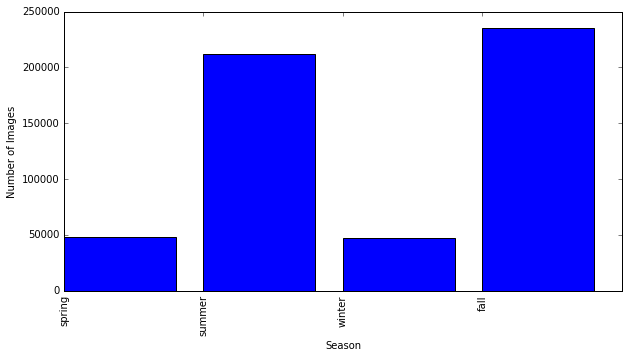

In [7]:
#Aggregate data by seasons
seasons_dict={'fall':['Sep','Oct','Nov'],'winter':['Dec','Jan','Feb'],
              'spring':['Mar','Apr','May'],'summer':['Jun','Jul','Aug']}

seasons_count_dict={'fall':0,'winter':0,'spring':0,'summer':0}

for d,c in zip(date_list,num_ims_list):
    month=d.split('-')[1]
    for s in seasons_dict:
        if month in seasons_dict[s]:
            seasons_count_dict[s] += int(c)
            
plt.rcParams['figure.figsize']=(10,5)        
fig,ax=plt.subplots()
rects1 = ax.bar(xrange(len(seasons_count_dict.keys())),seasons_count_dict.values())
plt.ylabel('Number of Images')
plt.xlabel('Season')
plt.xticks(xrange(len(seasons_count_dict.values())), seasons_count_dict.keys(), 
          rotation='vertical')
plt.savefig(os.path.join(img_save_dir,'num_ims_season.png'))
plt.show() 

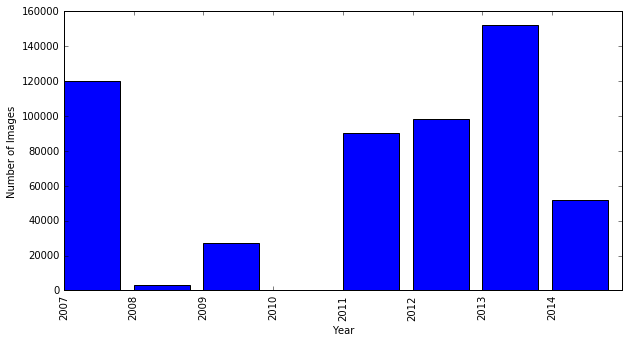

In [8]:
#By year
lines=open(os.path.join(csv_load_dir,'timelapse_num_ims_year.txt'),'rb').readlines()

date_list=[]
num_ims_list=[]
for l in lines:
    date_list.append(l.split('\t')[0])
    num_ims_list.append(l.split('\t')[1].strip())
fig,ax=plt.subplots()
rects1 = ax.bar(xrange(len(date_list)),num_ims_list)
plt.ylabel('Number of Images')
plt.xlabel('Year')
plt.xticks(xrange(len(date_list)), date_list, 
          rotation='vertical')
plt.savefig(os.path.join(img_save_dir,'num_ims_year.png'))
plt.show() 

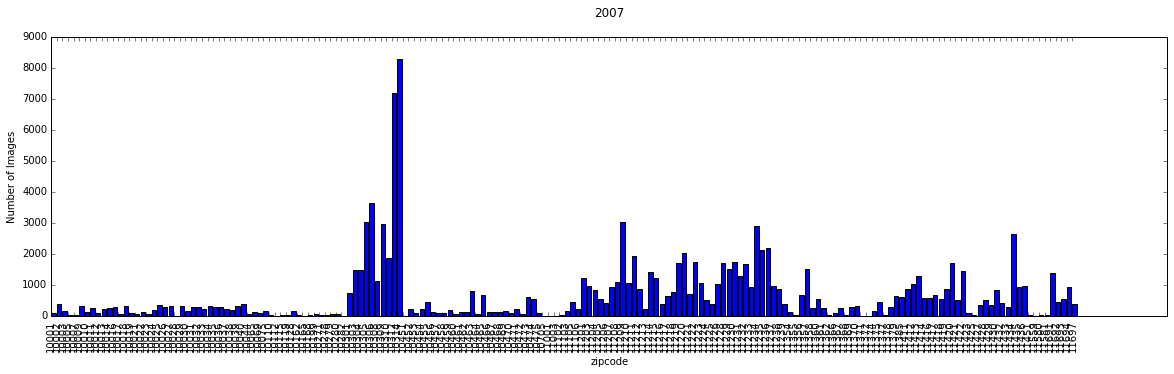

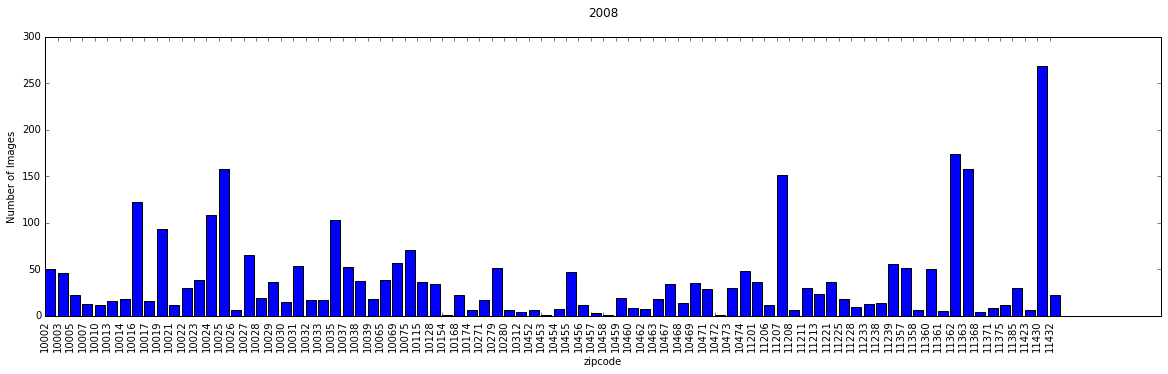

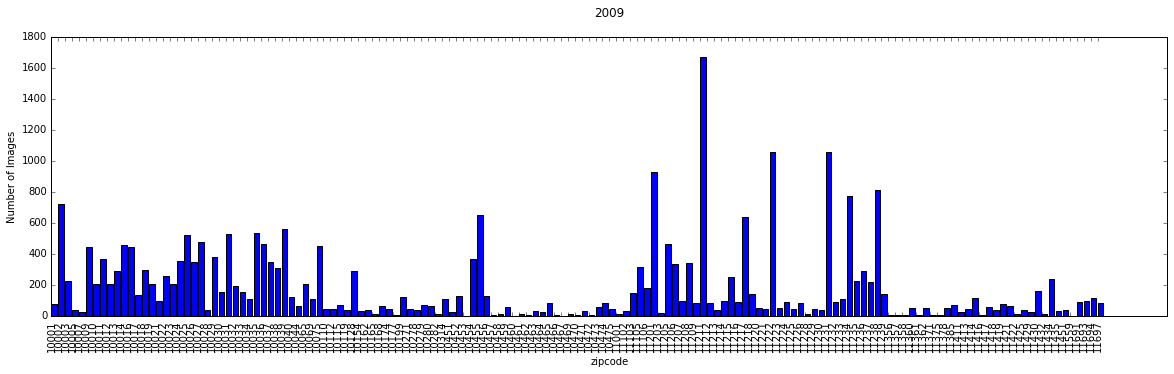

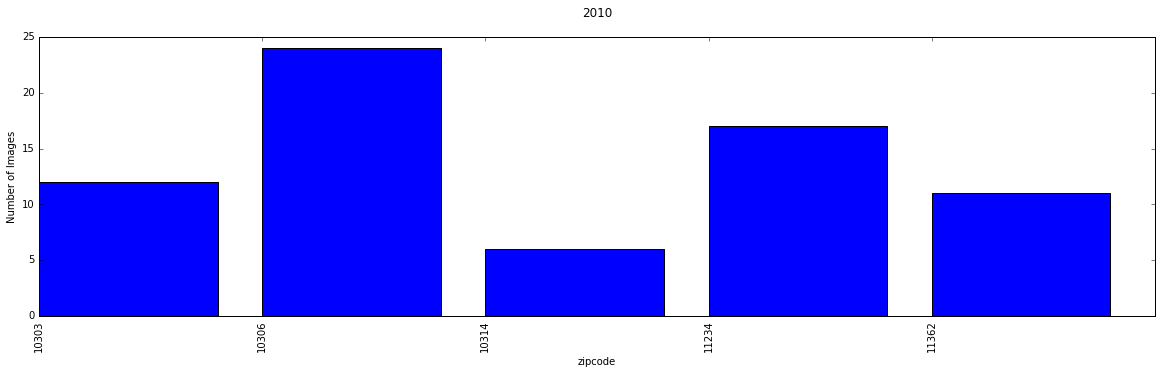

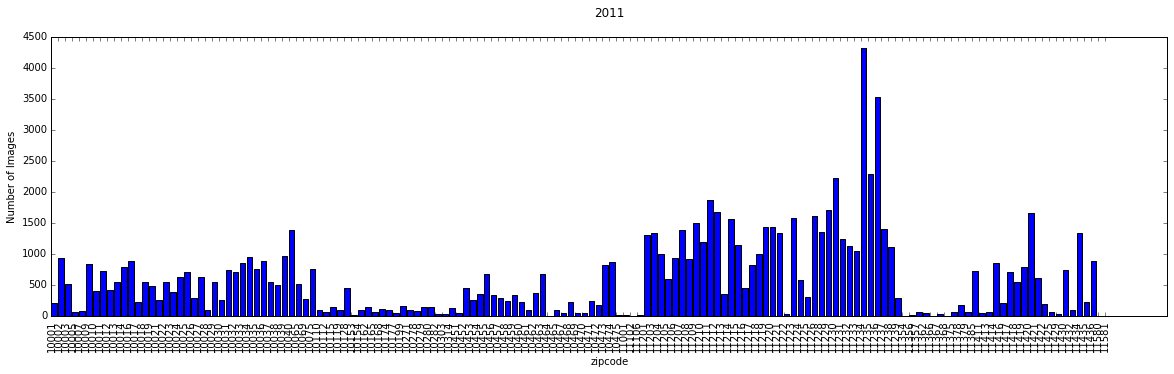

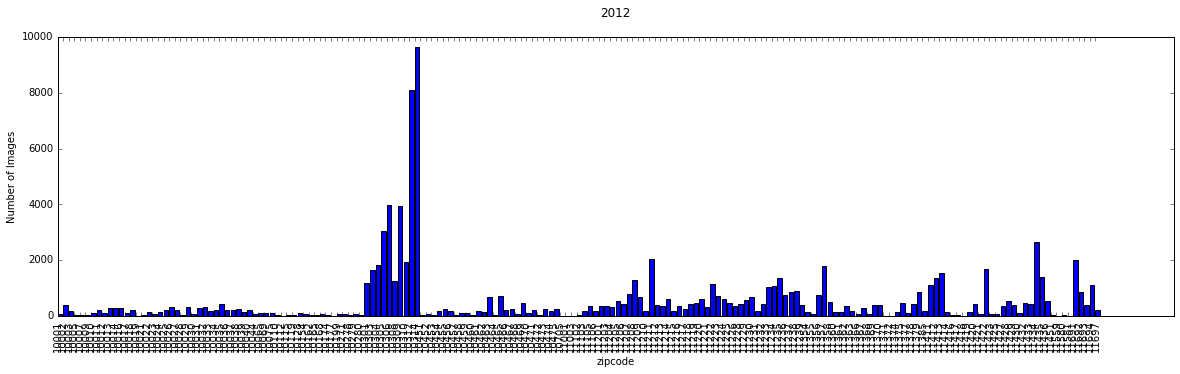

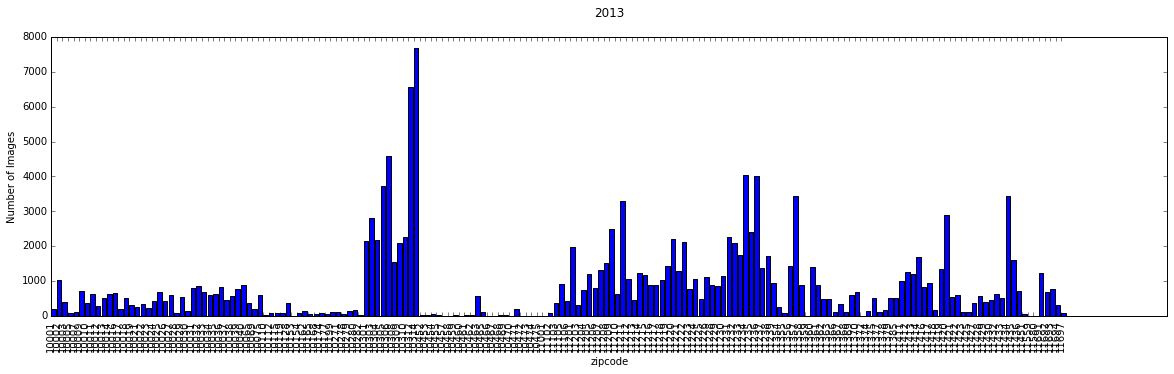

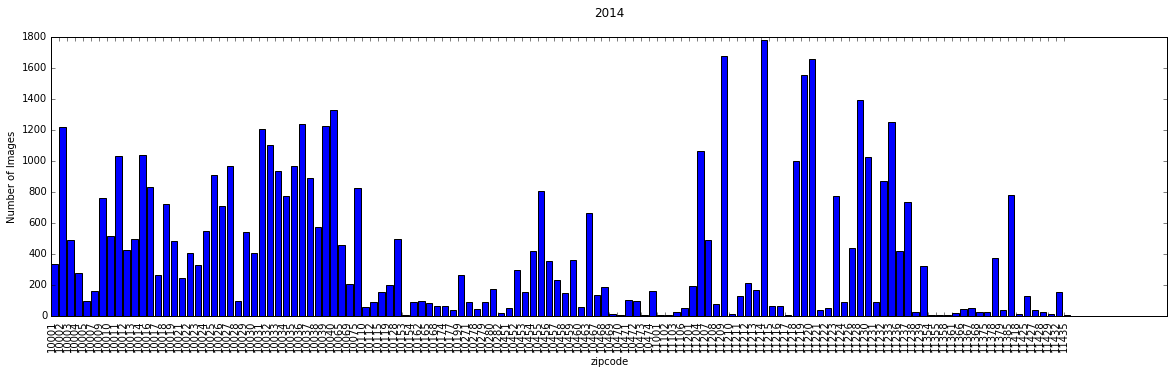

In [13]:
#Number of images by year for each zipcode
class Zip_Im_Stats:
    zip_list=None
    im_count=None

lines=open(os.path.join(csv_load_dir,'timelapse_num_ims_year_zip.txt'),'rb').readlines()
years=range(2007,2015)
num_ims_dict=dict.fromkeys(years,)
for y in years:
    im_stats=Zip_Im_Stats()
    im_stats.zip_list=[]
    im_stats.im_count=[]
    num_ims_dict[y]=im_stats
    
for l in lines:
    y=int(l.split('\t')[0].strip())
    num_ims_dict[y].zip_list.append(l.split('\t')[1].strip())
    num_ims_dict[y].im_count.append(l.split('\t')[2].strip())
    num_ims_list.append(l.split('\t')[1].strip())
    
#fig,(axes)=plt.subplots(len(years),sharex=True, sharey=False)
#fig.subplots_adjust(hspace=3)

plt.rcParams['figure.figsize']=(20,5)

fig.set_figwidth(80) 

for year in years: 
    fig,ax=plt.subplots()
    ax.set_title('%d\n'%year)
    zip_list=num_ims_dict[year].zip_list
    im_count=num_ims_dict[year].im_count
    rects = ax.bar(xrange(len(zip_list)),im_count)
    plt.ylabel('Number of Images')
    plt.xlabel('zipcode')
    plt.xticks(xrange(len(zip_list)), zip_list, 
        rotation='vertical')
    plt.savefig(os.path.join(img_save_dir,'num_ims_zipcode_%d.png'%year))
    plt.show() 



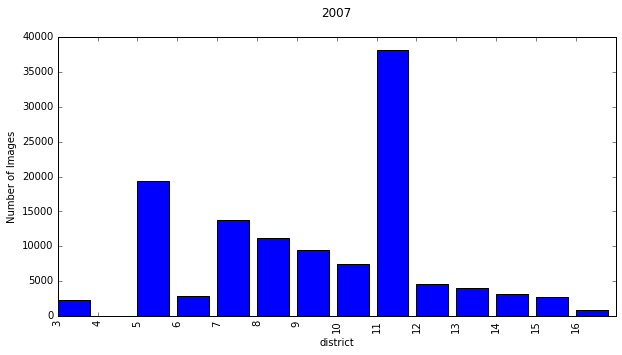

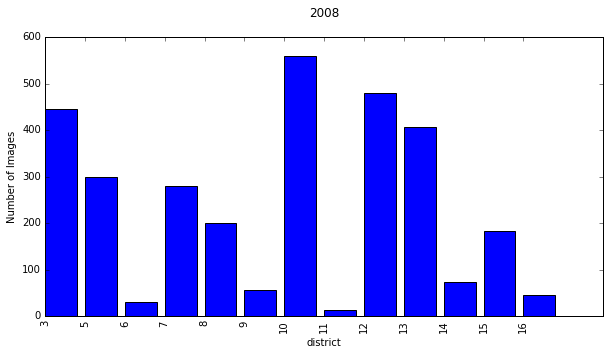

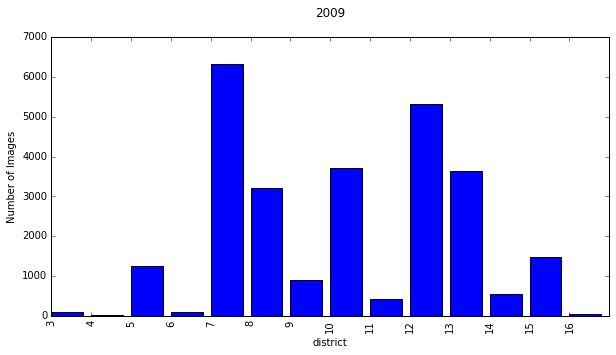

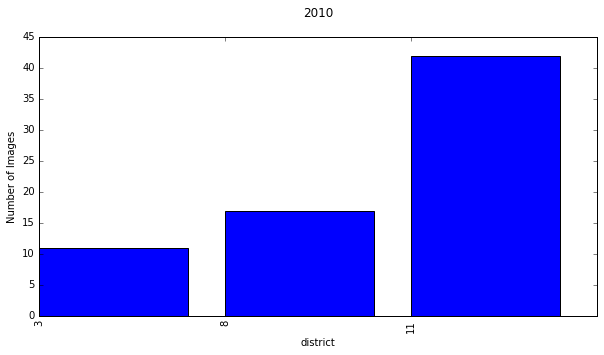

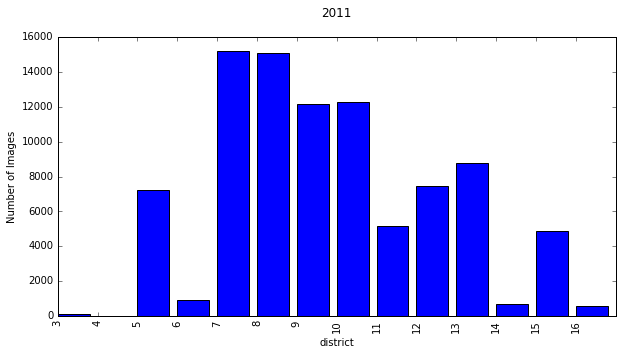

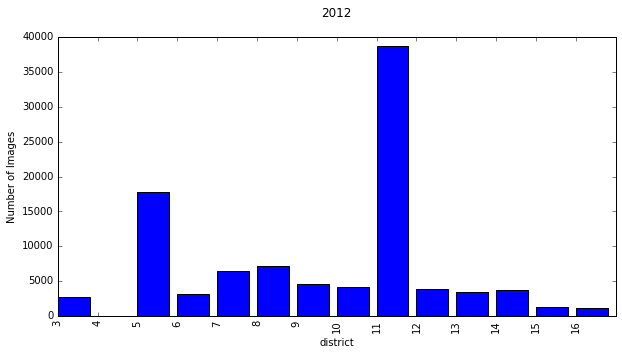

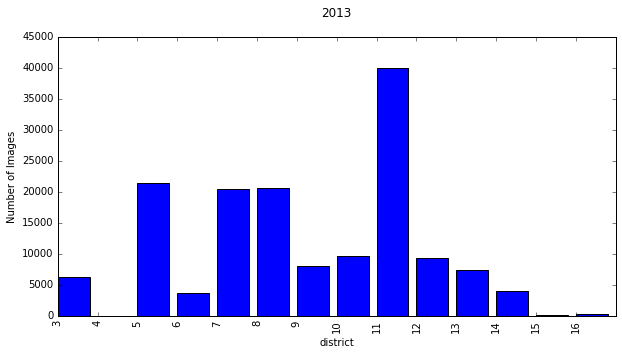

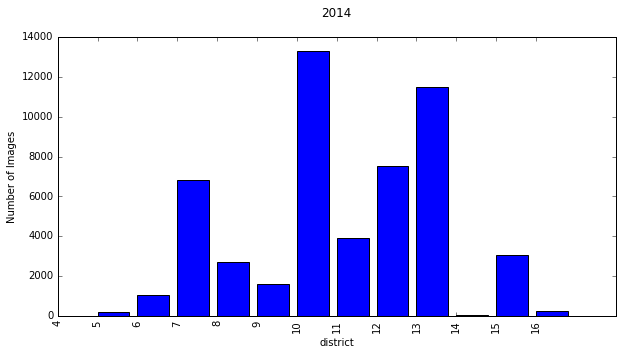

In [14]:
#Number of images by year for each district
class Dist_Im_Stats:
    dist_list=None
    im_count=None

#By year for each zipcode
lines=open(os.path.join(csv_load_dir,'timelapse_num_ims_year_dist.txt'),'rb').readlines()
years=range(2007,2015)
num_ims_dict=dict.fromkeys(years,)
for y in years:
    im_stats=Dist_Im_Stats()
    im_stats.dist_list=[]
    im_stats.im_count=[]
    num_ims_dict[y]=im_stats
    
for l in lines:
    y=int(l.split('\t')[0].strip())
    num_ims_dict[y].dist_list.append(l.split('\t')[1].strip())
    num_ims_dict[y].im_count.append(l.split('\t')[2].strip())
    num_ims_list.append(l.split('\t')[1].strip())
    
#fig,(axes)=plt.subplots(len(years),sharex=True, sharey=False)
#fig.subplots_adjust(hspace=3)

plt.rcParams['figure.figsize']=(10,5)

fig.set_figwidth(80) 

for year in years: 
    fig,ax=plt.subplots()
    ax.set_title('%d\n'%year)
    dist_list=num_ims_dict[year].dist_list
    im_count=num_ims_dict[year].im_count
    rects = ax.bar(xrange(len(dist_list)),im_count)
    plt.ylabel('Number of Images')
    plt.xlabel('district')
    plt.xticks(xrange(len(dist_list)), dist_list, 
        rotation='vertical')
    plt.savefig(os.path.join(img_save_dir,'num_ims_district_%d.png'%year))

    plt.show()

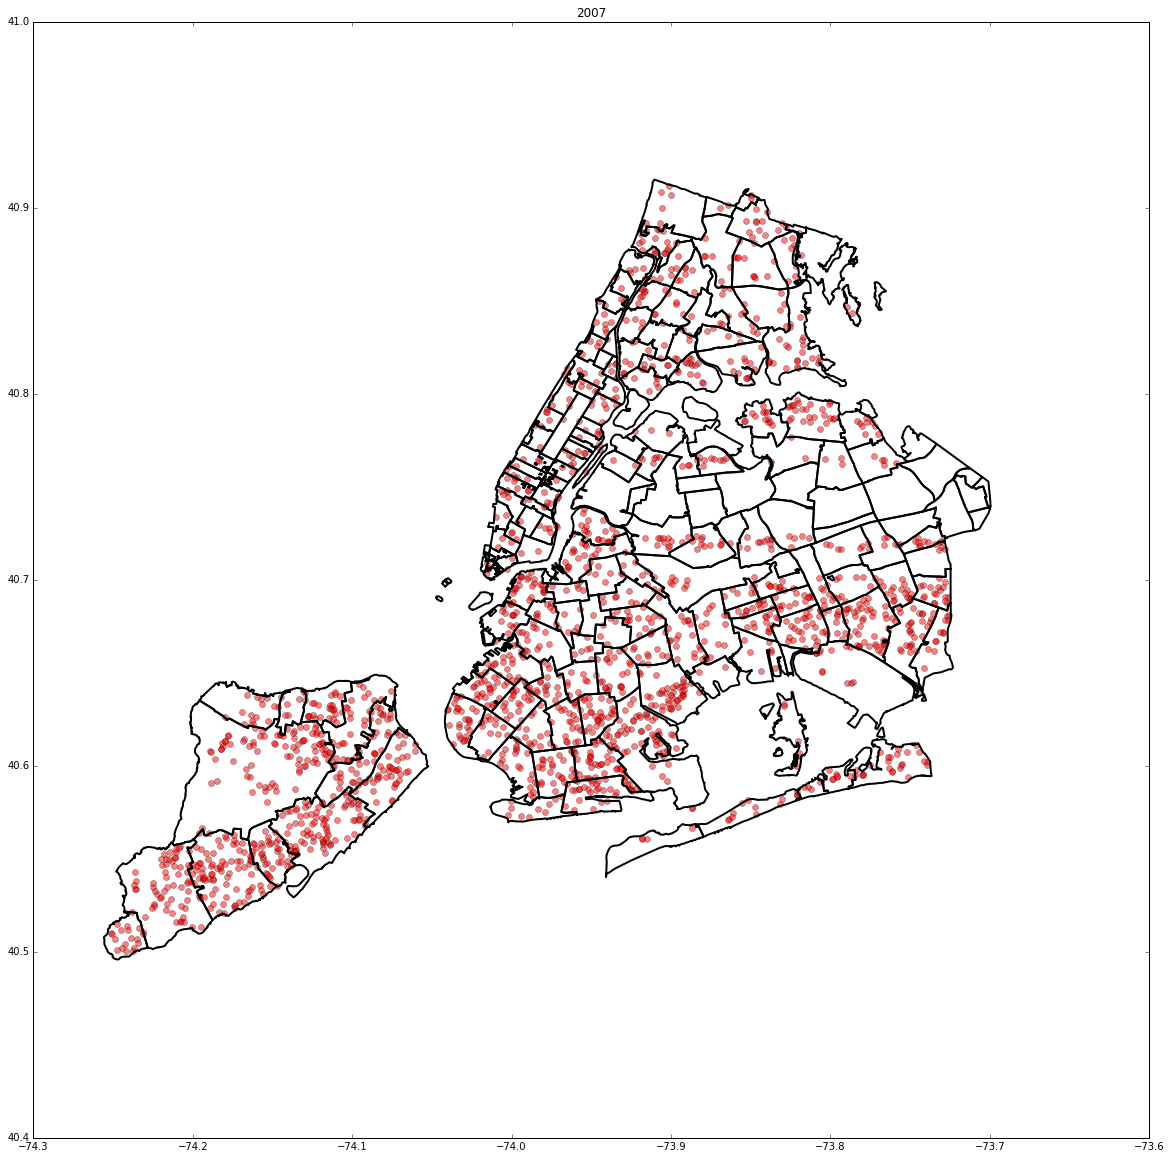

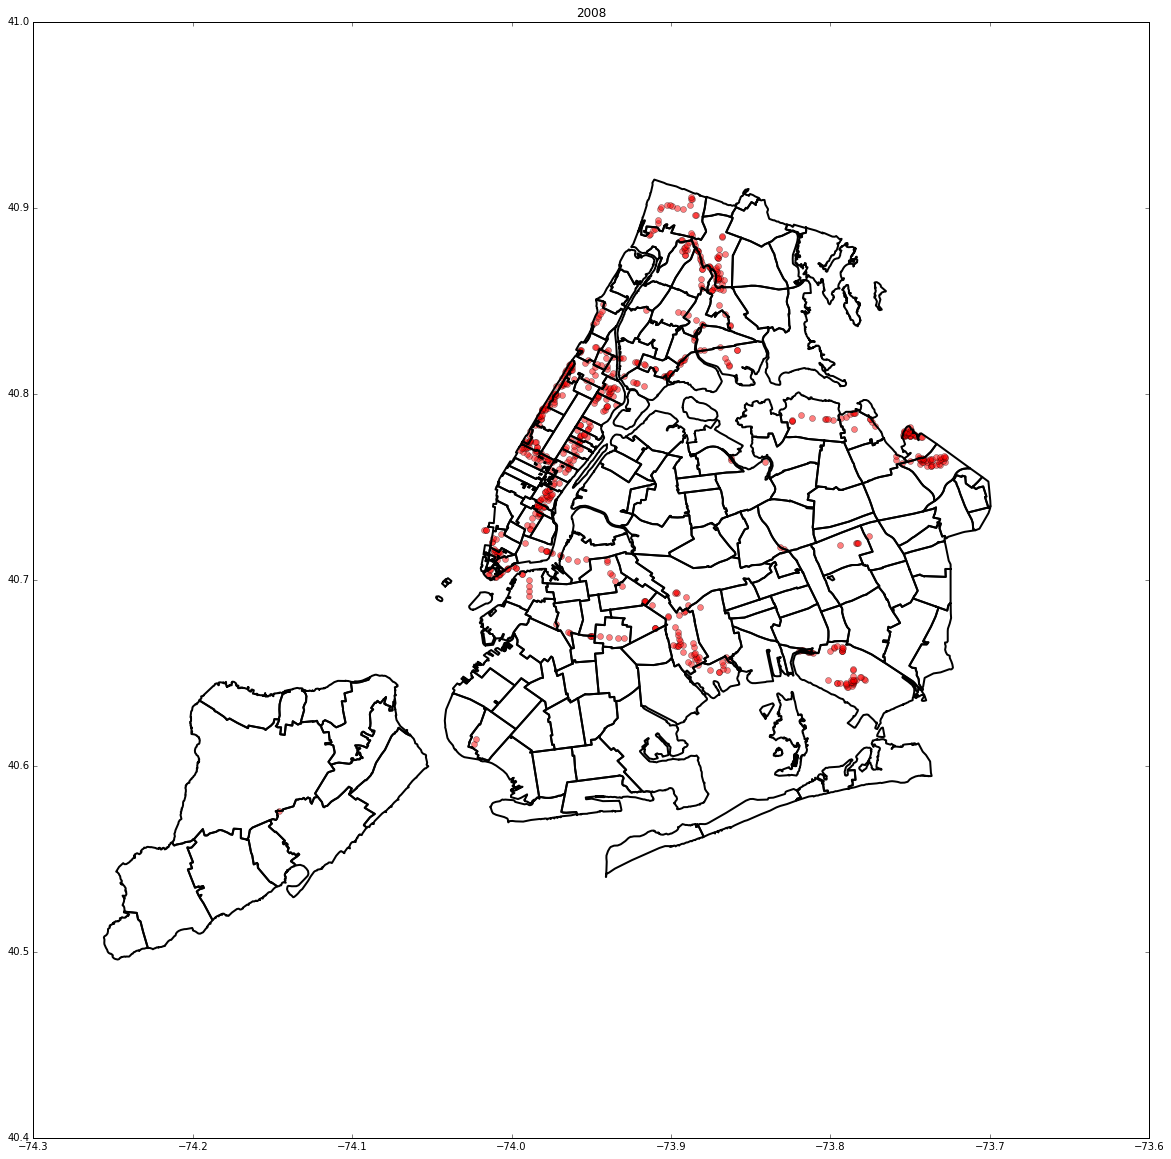

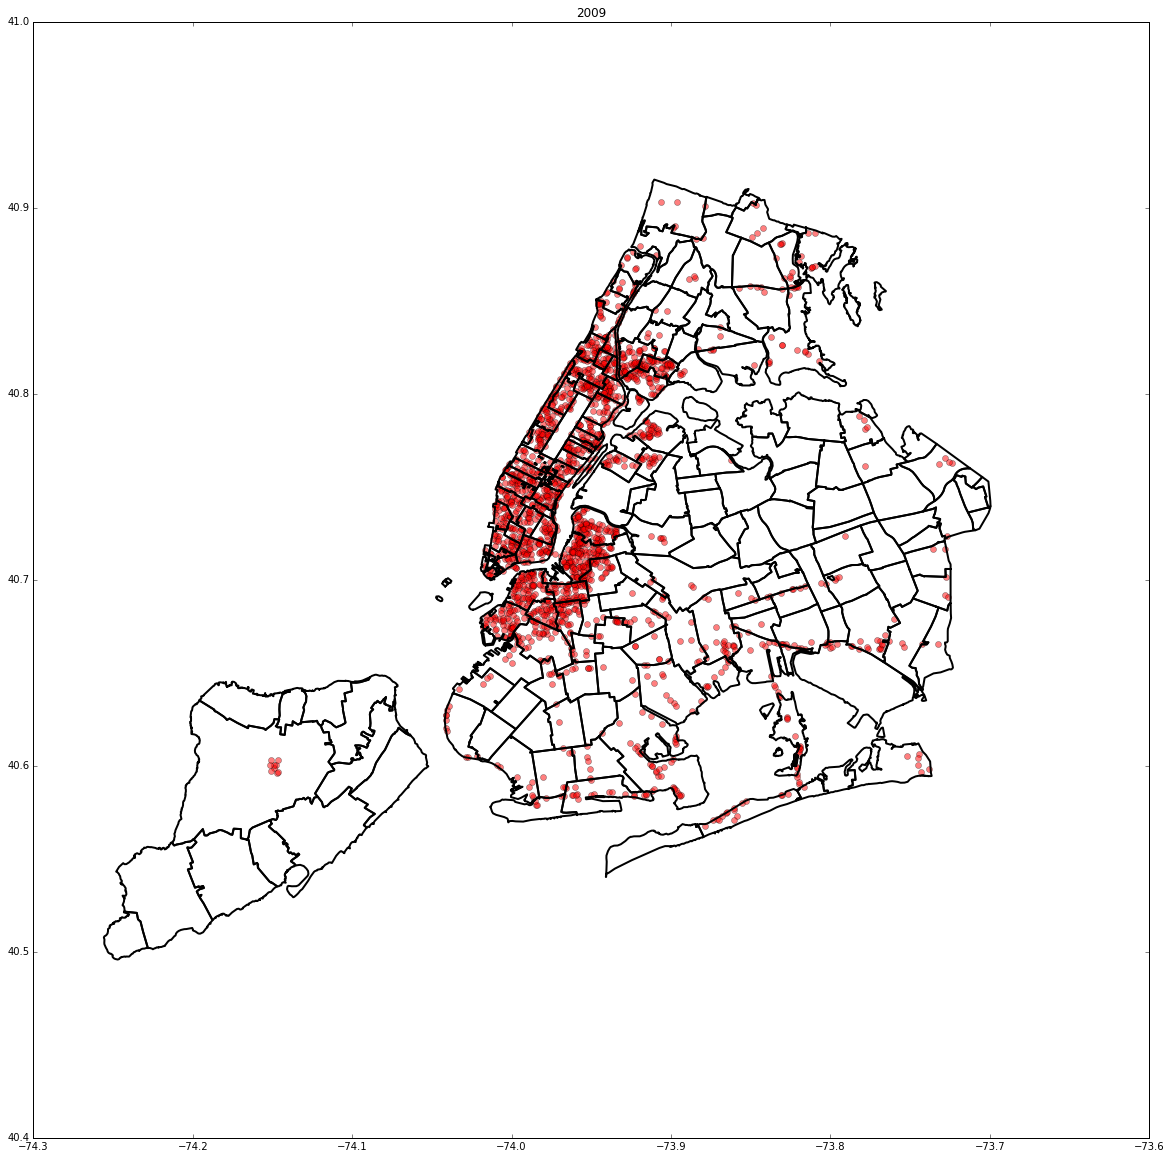

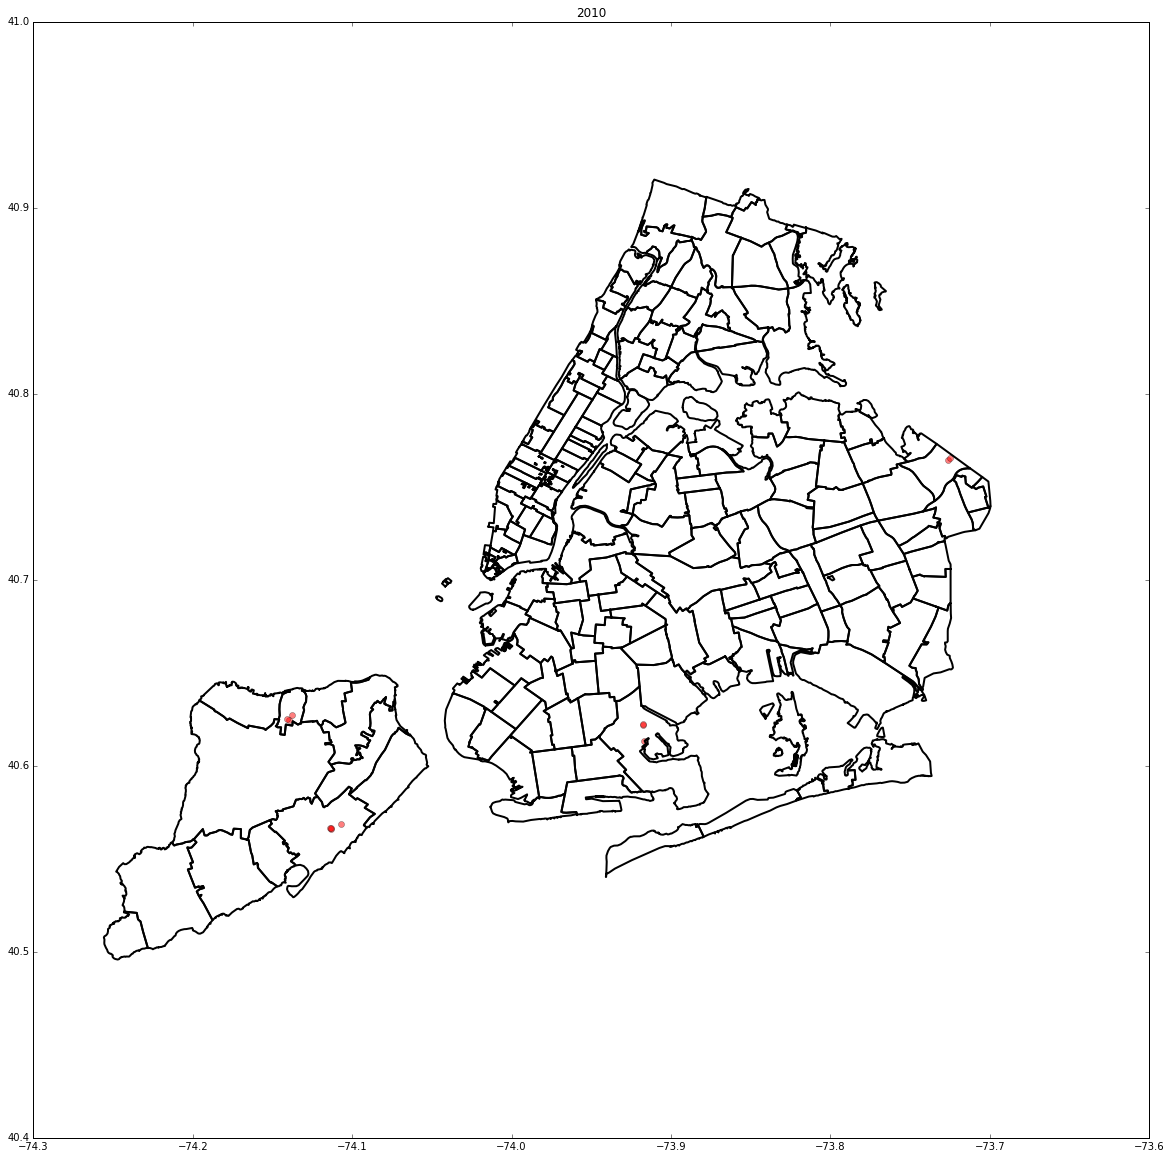

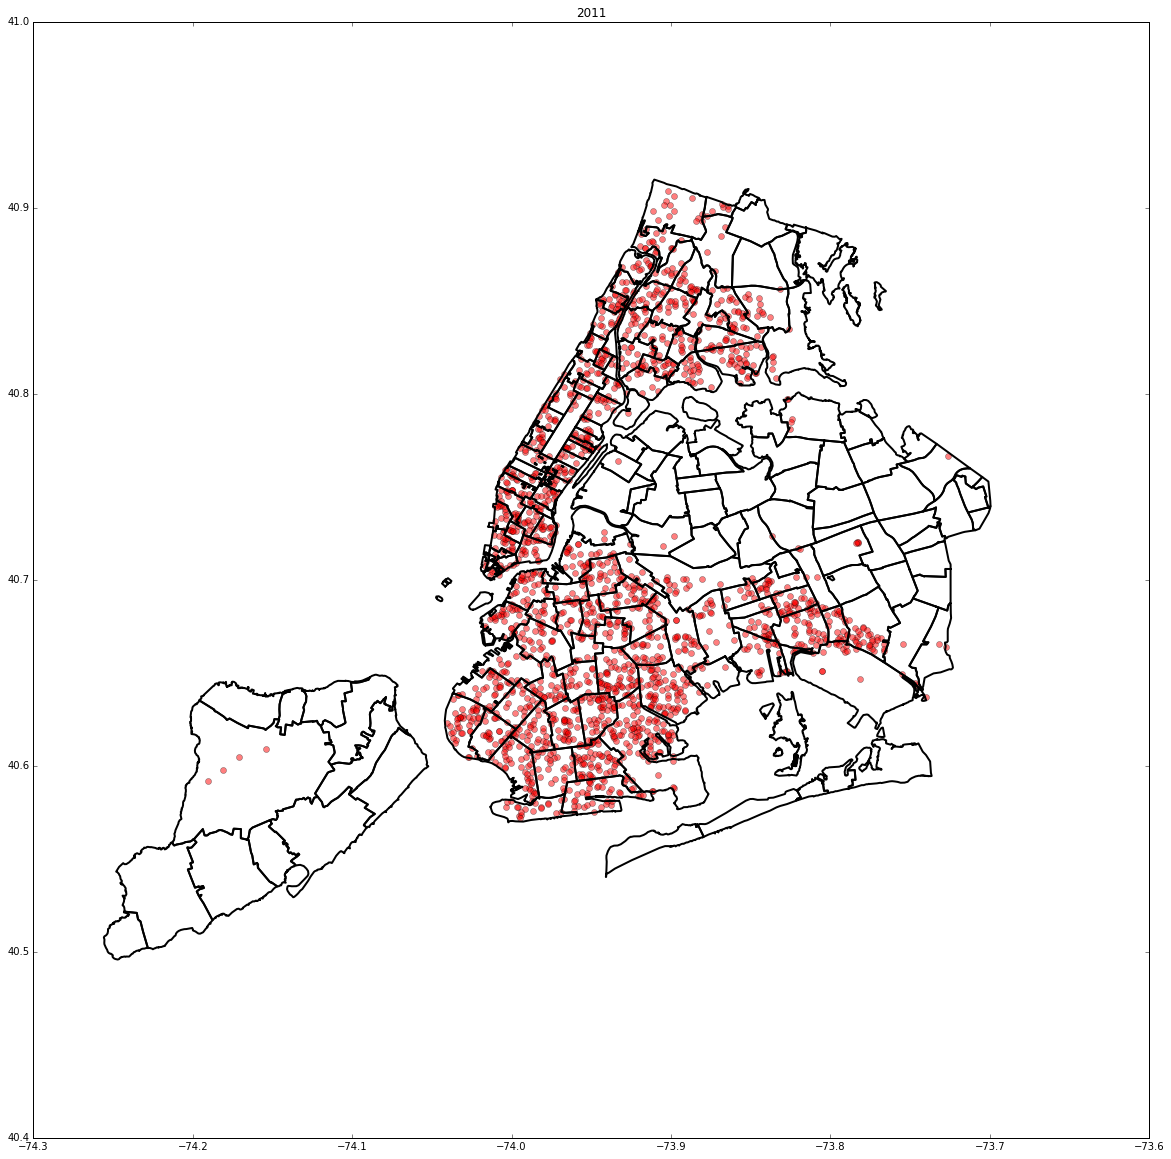

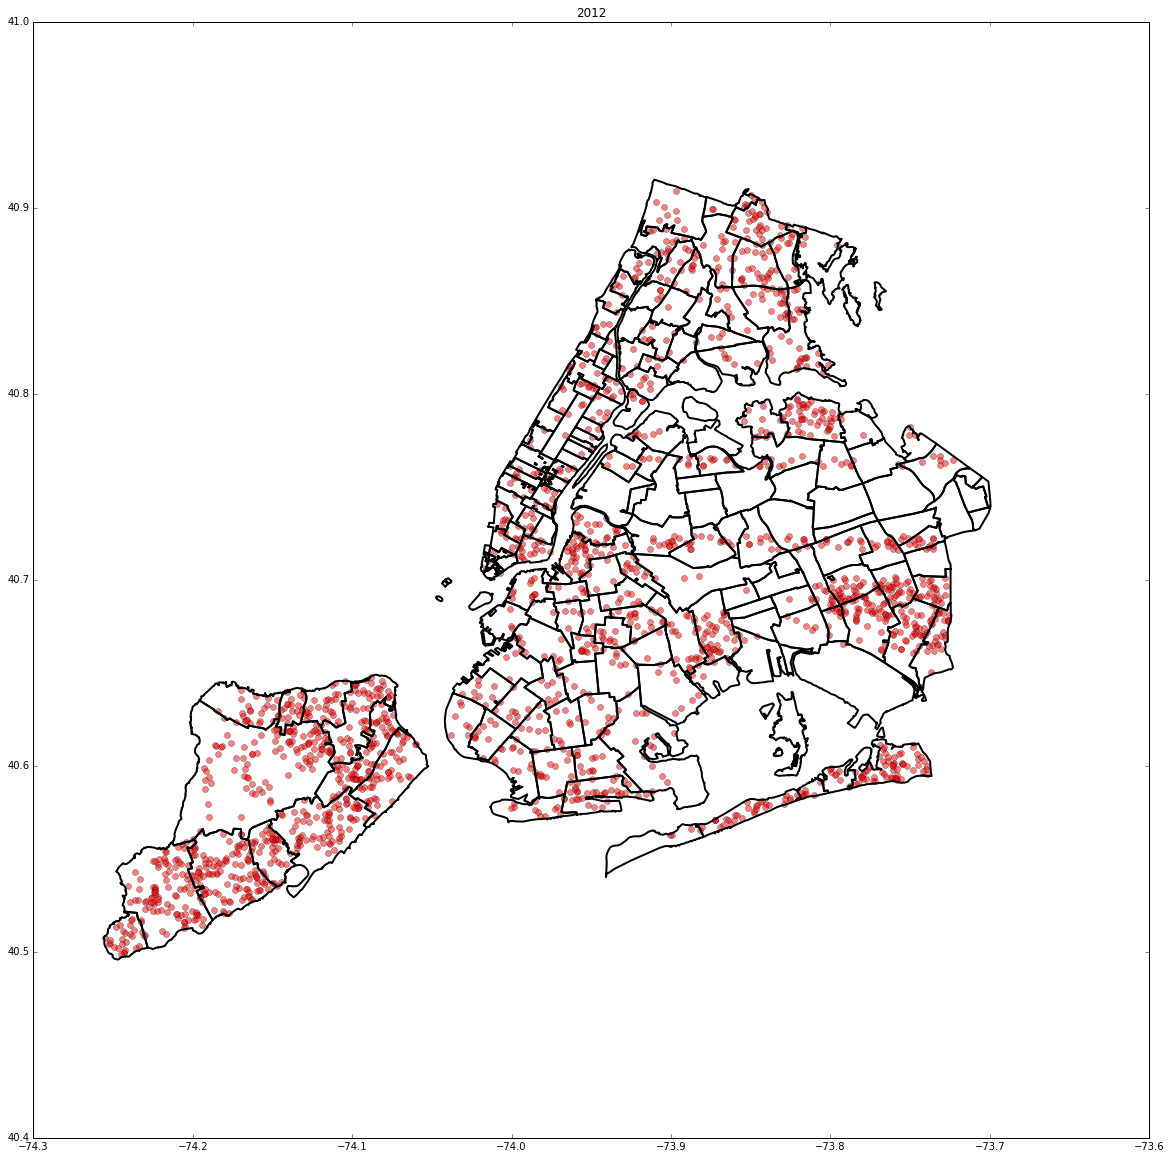

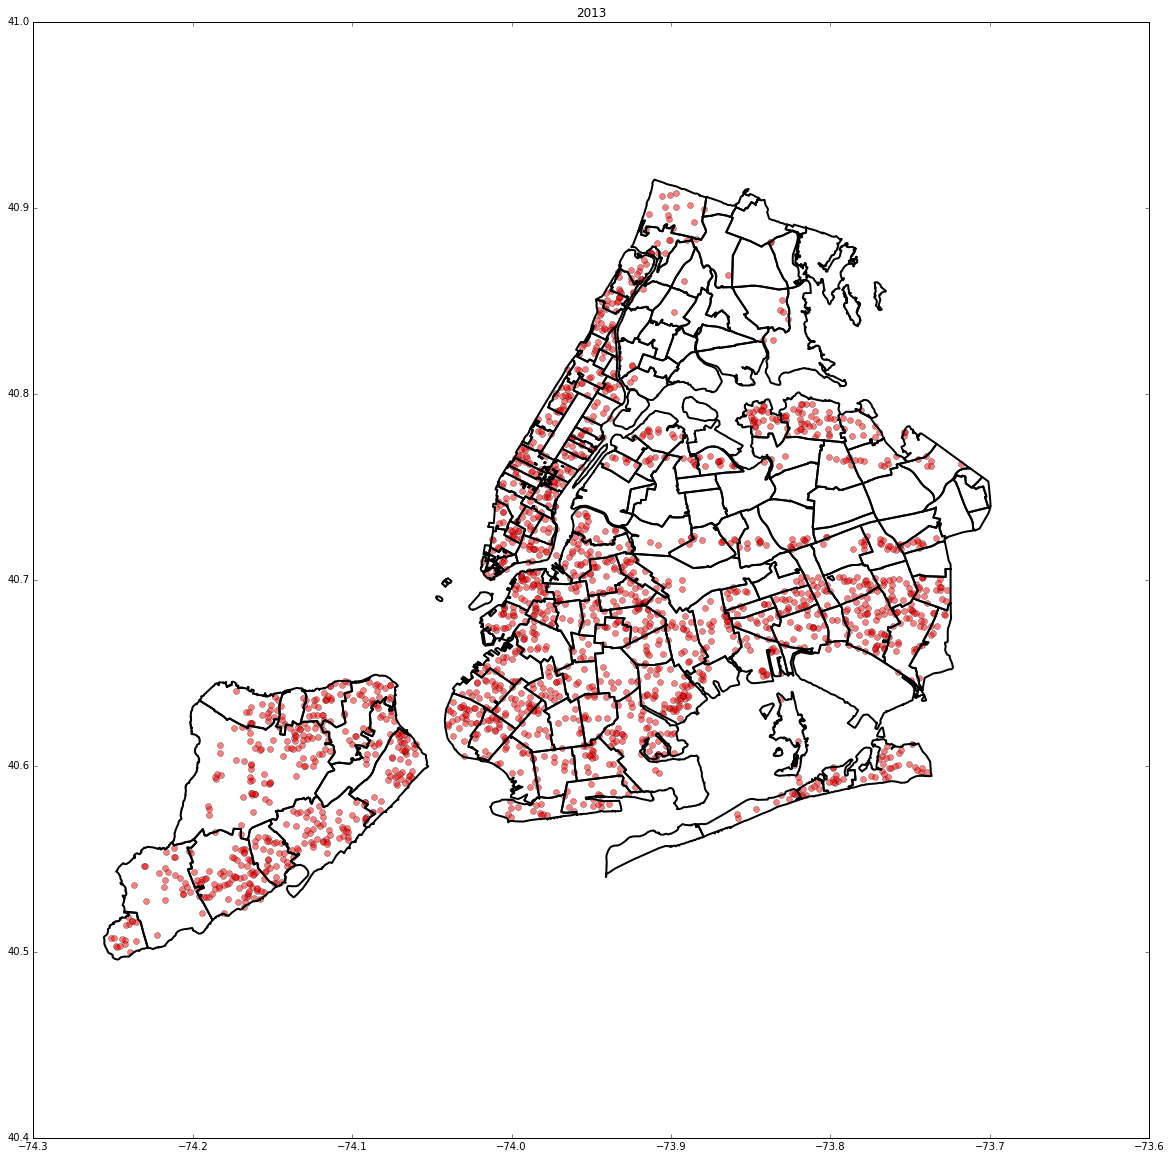

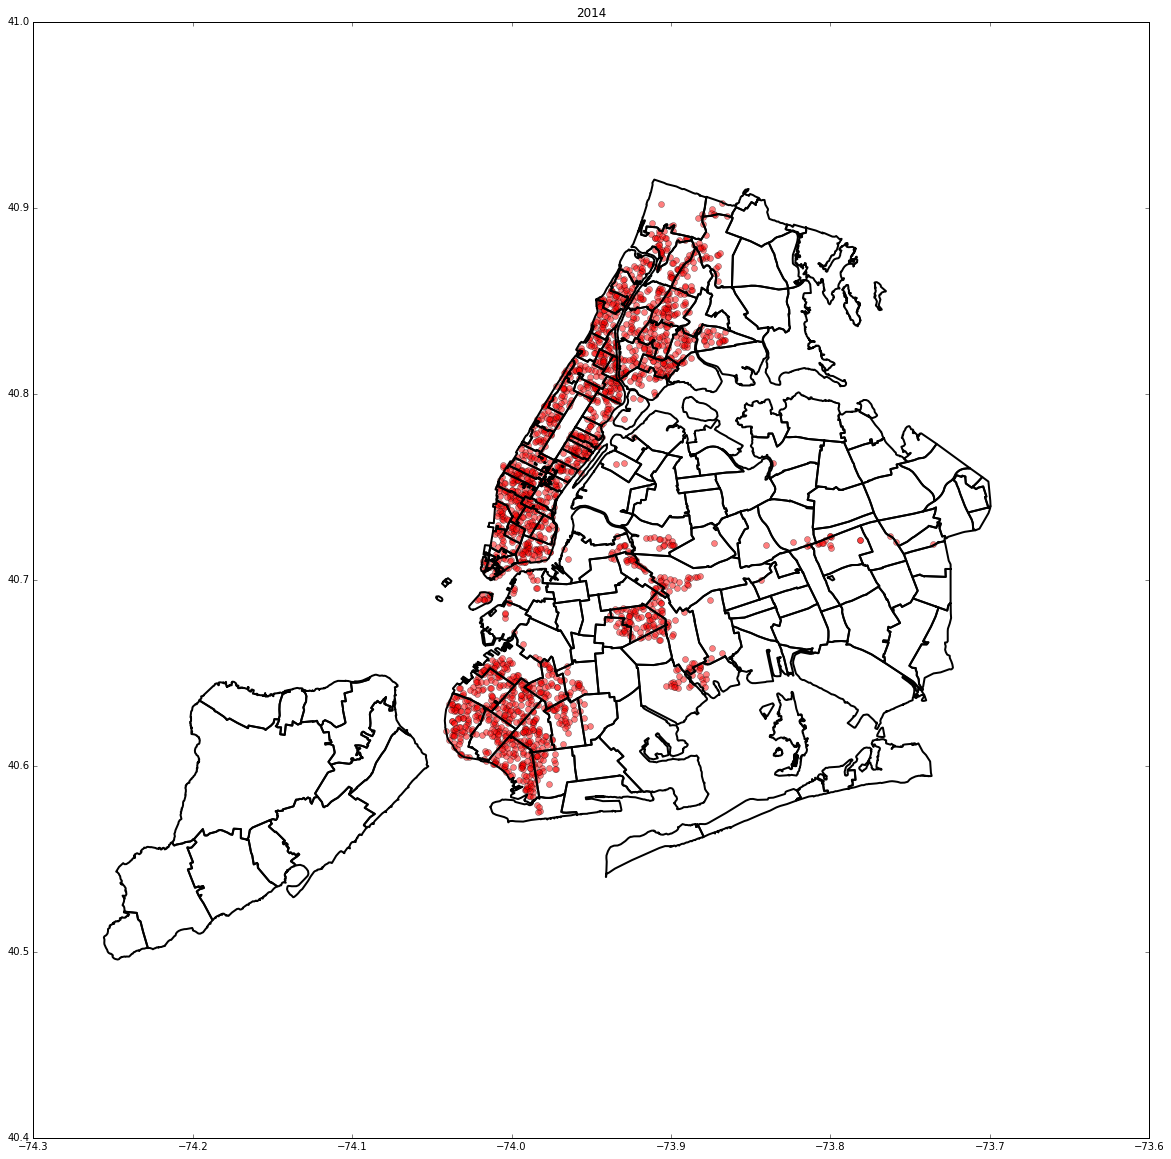

In [11]:
#Show maps of samples over time with zipcode boundaries
import json 
import matplotlib.pyplot as plt
import numpy as np
import random
plt.rcParams['figure.figsize']=(20,20)

#First load zipcode boundaries
boundary_fname='/imagenetdb3/tgebru/cvpr2016/housing_shapefiles/\
nyc-zip-code-tabulation-areas-polygons.geojson'

years=range(2007,2015)
for year in years:
    samples_fname=os.path.join(csv_load_dir,'timelapse_lat_lng_%d.txt')%year
    with open(boundary_fname) as json_file:
        json_data=json.load(json_file)

    x_list=[]
    y_list=[]
 
    #Plot train coordinates of lat/lngs
    fig = plt.figure() 
    ax = fig.gca()

    #Randomly sample 1k points to plot
    NUM_SAMPLES=2000
    all_lines=open(samples_fname,'rb').readlines()
    if len(all_lines)> NUM_SAMPLES:
        latlong_samples=random.sample(all_lines,NUM_SAMPLES)
    else:
        latlong_samples=all_lines

    for l in latlong_samples:
        ax.plot(l.split('\t')[1].strip(),l.split('\t')[0].strip(),'ro',alpha=0.5)
        ax.set_title(year)

    #Plot zipcode boundaries
    for feat in json_data['features']:
        coords = feat['geometry']['coordinates'] 
        x_list.append([i for i,j in coords[0]])
        y_list.append([j for i,j in coords[0]])
    
    for x,y in zip(x_list,y_list):
        ax.plot(x,y,'k',linewidth=2.0)
    plt.savefig(os.path.join(img_save_dir,'im_samples_zipcode_%d.png'%year))

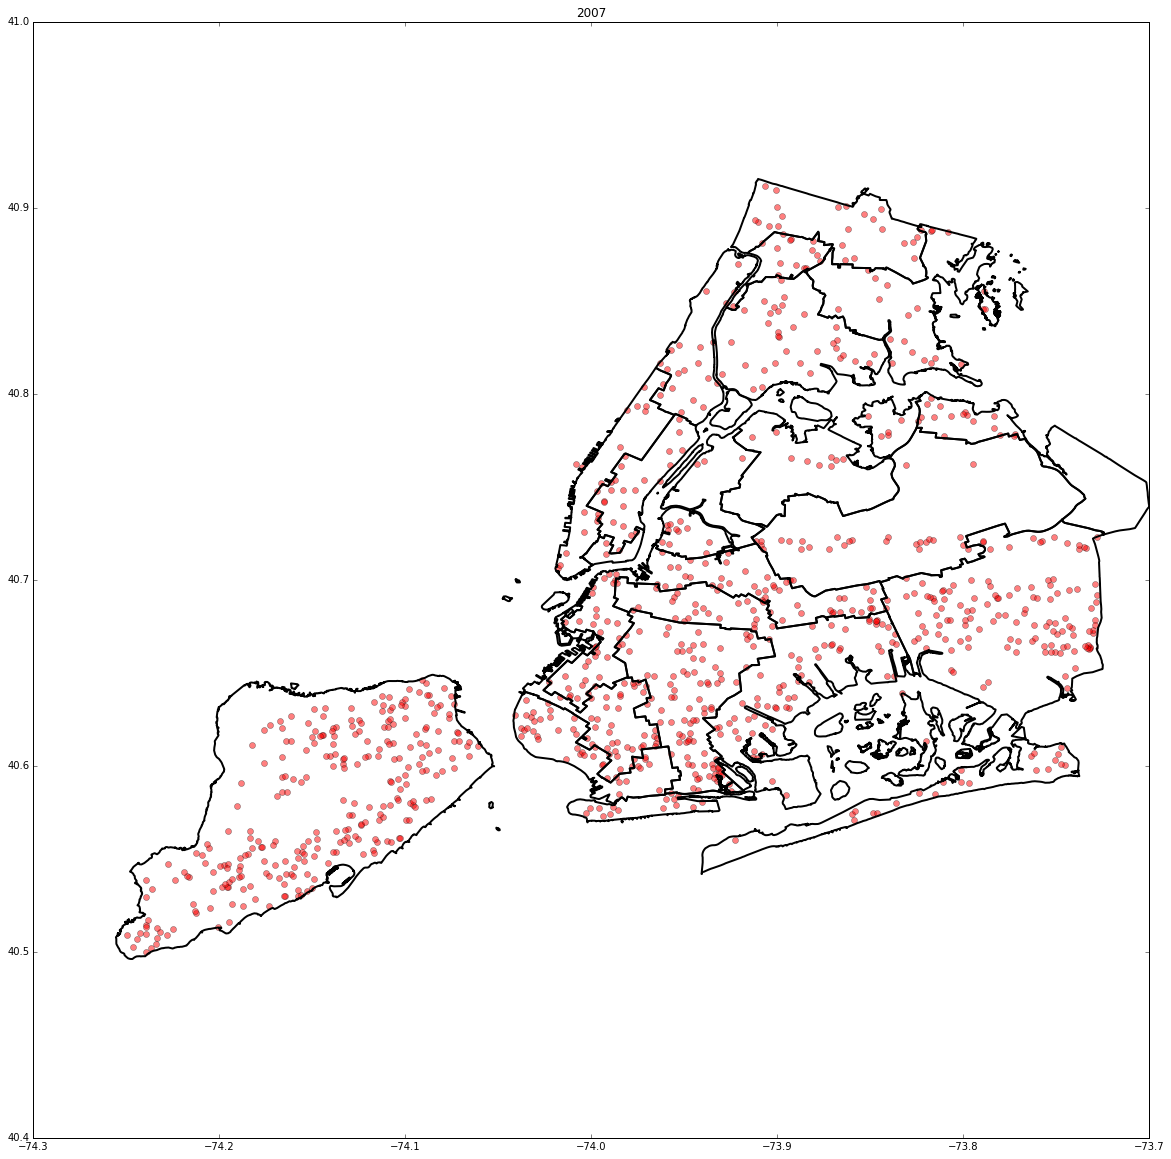

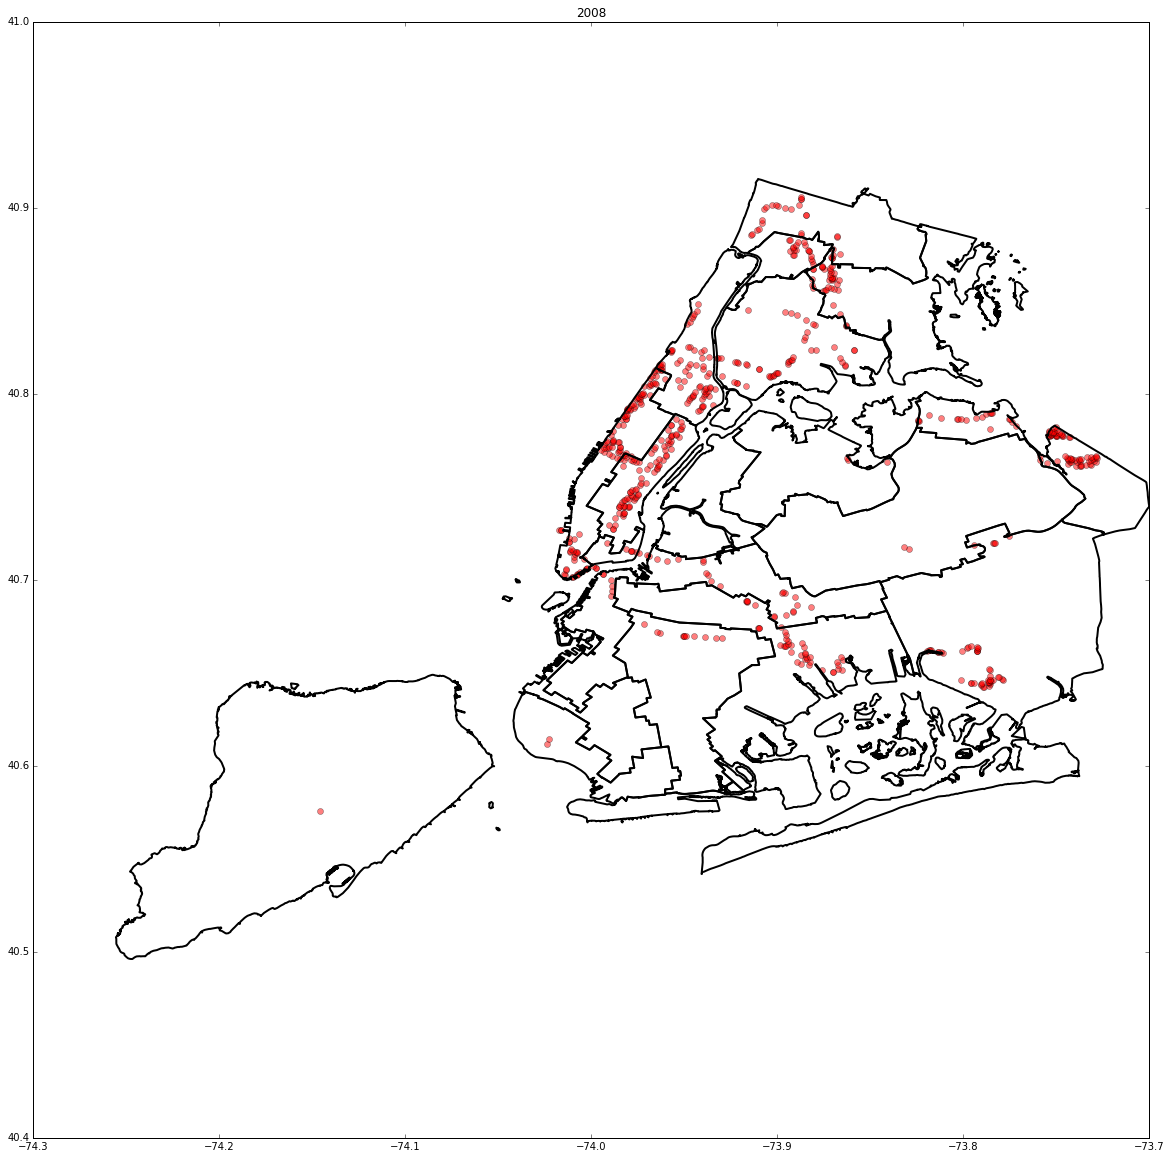

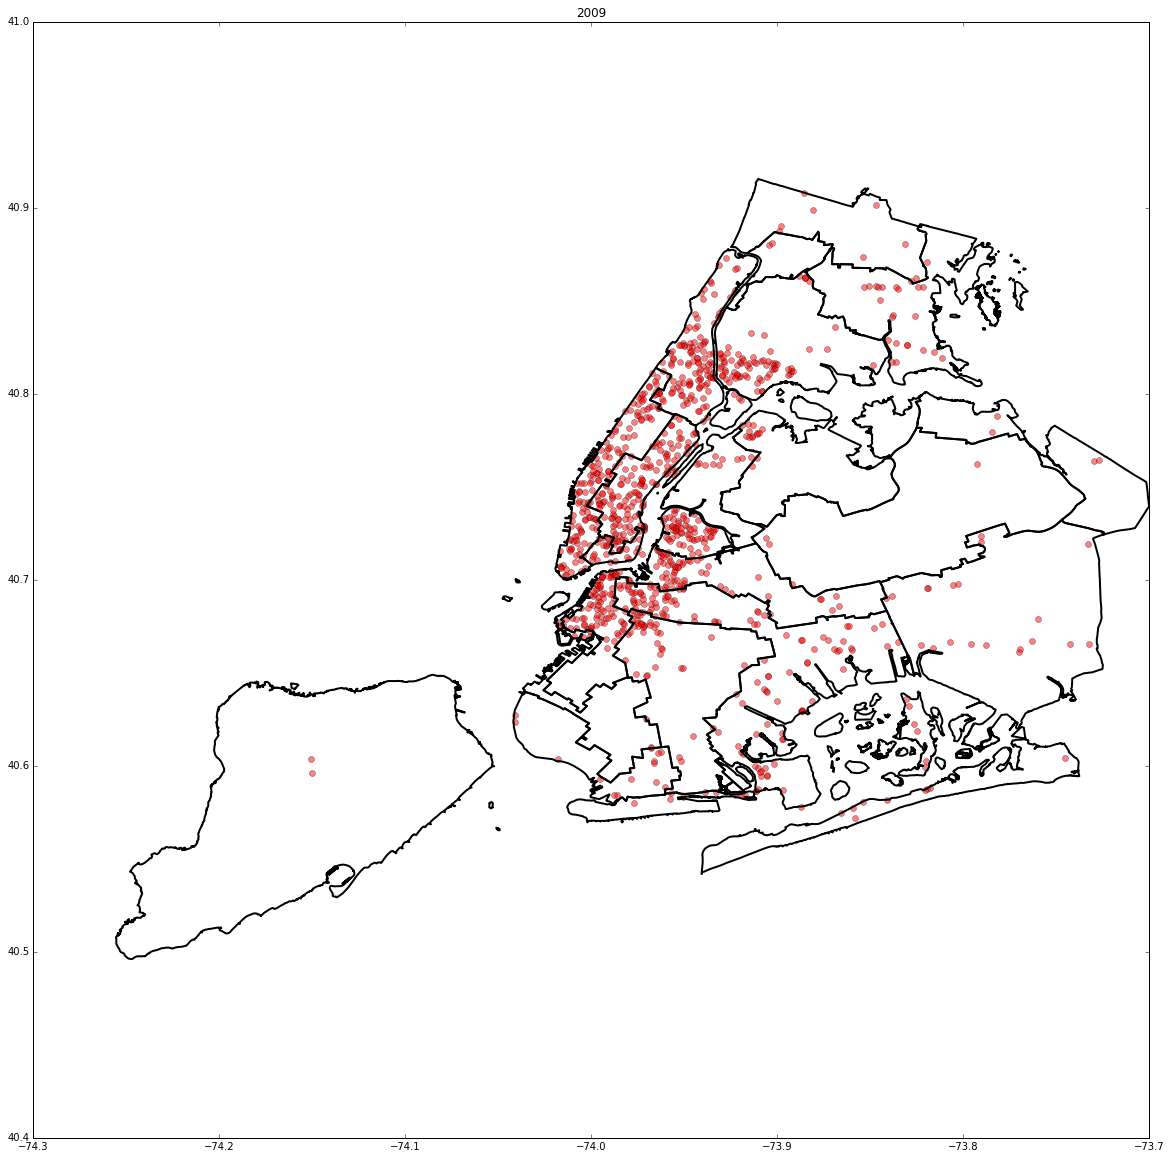

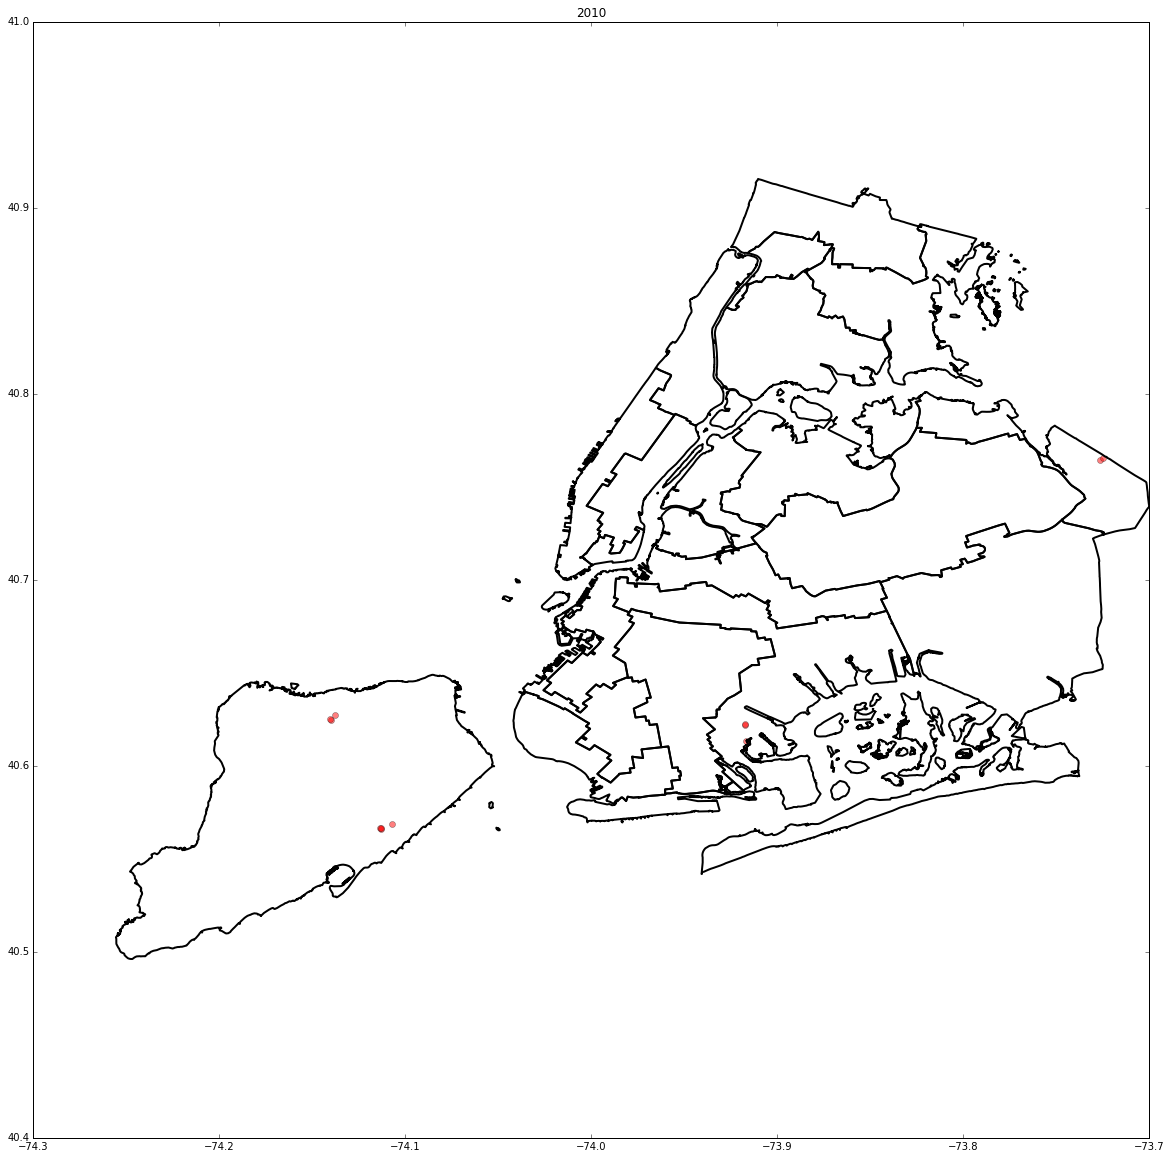

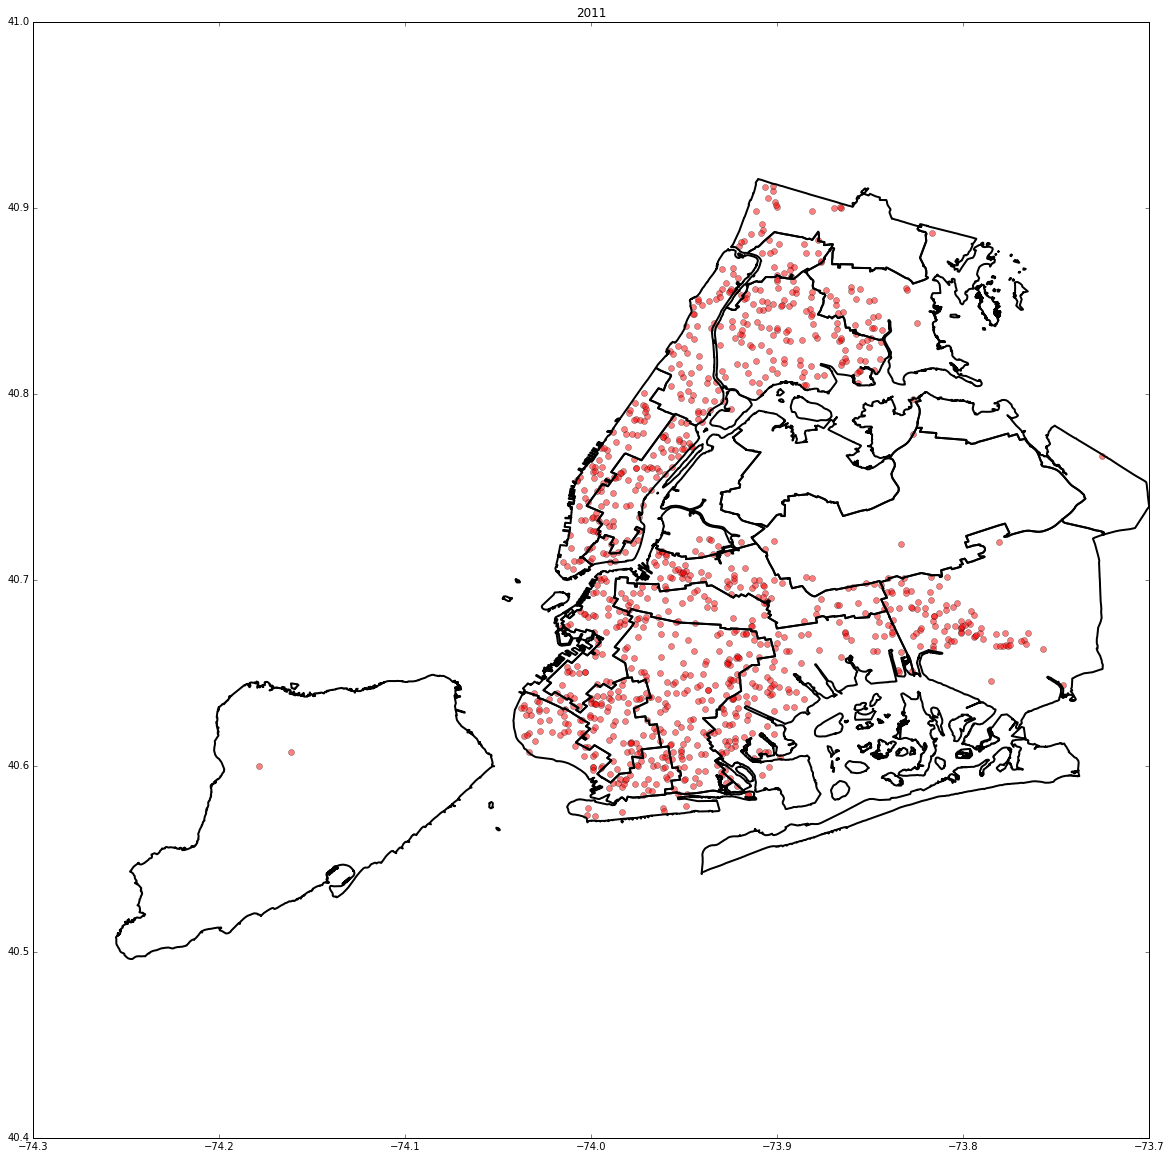

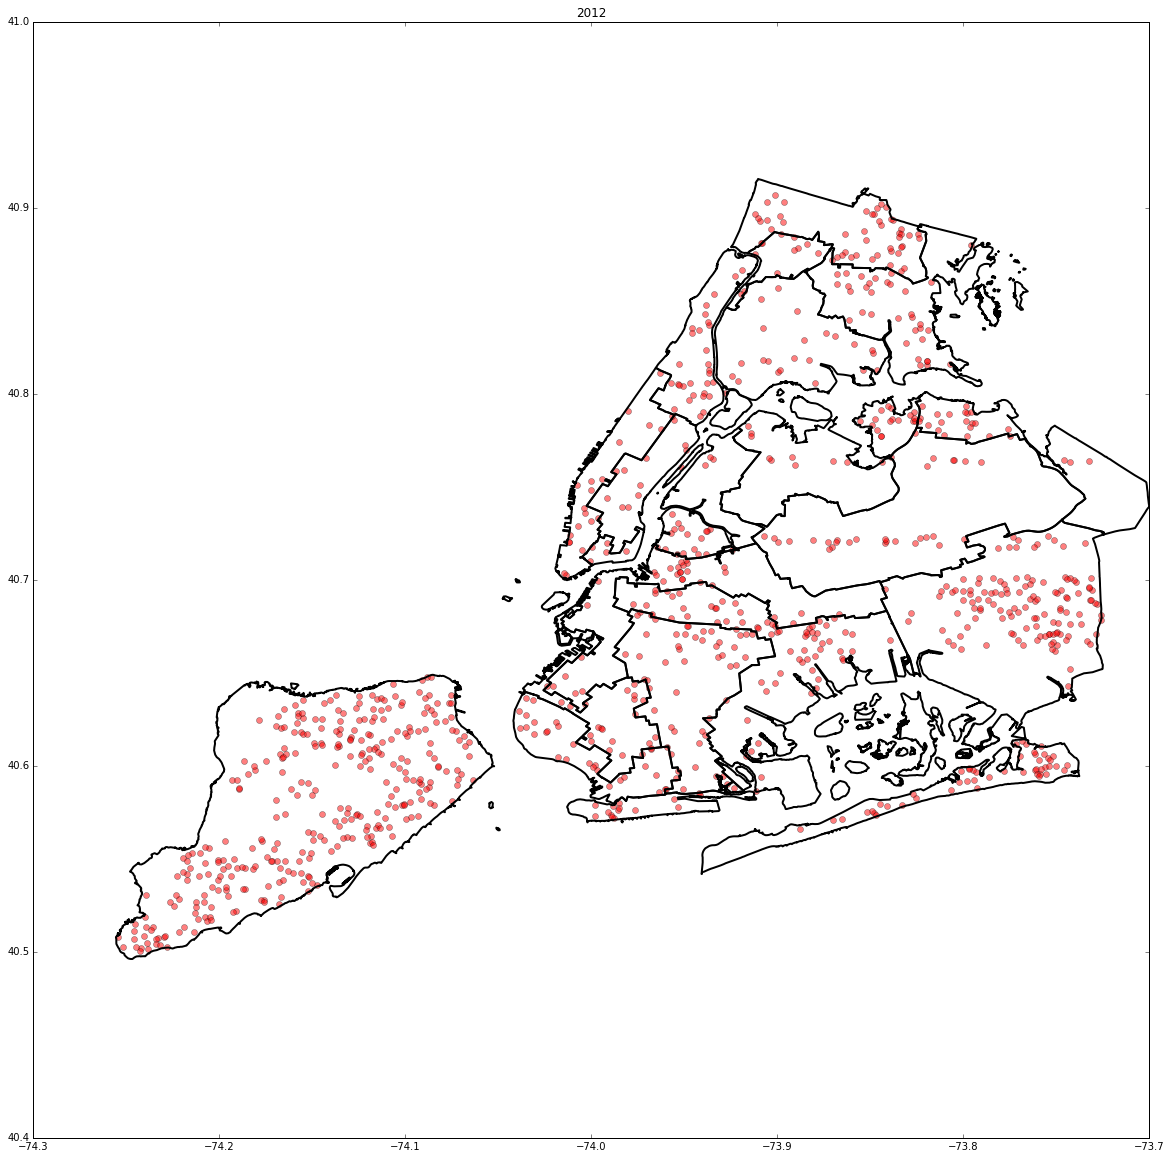

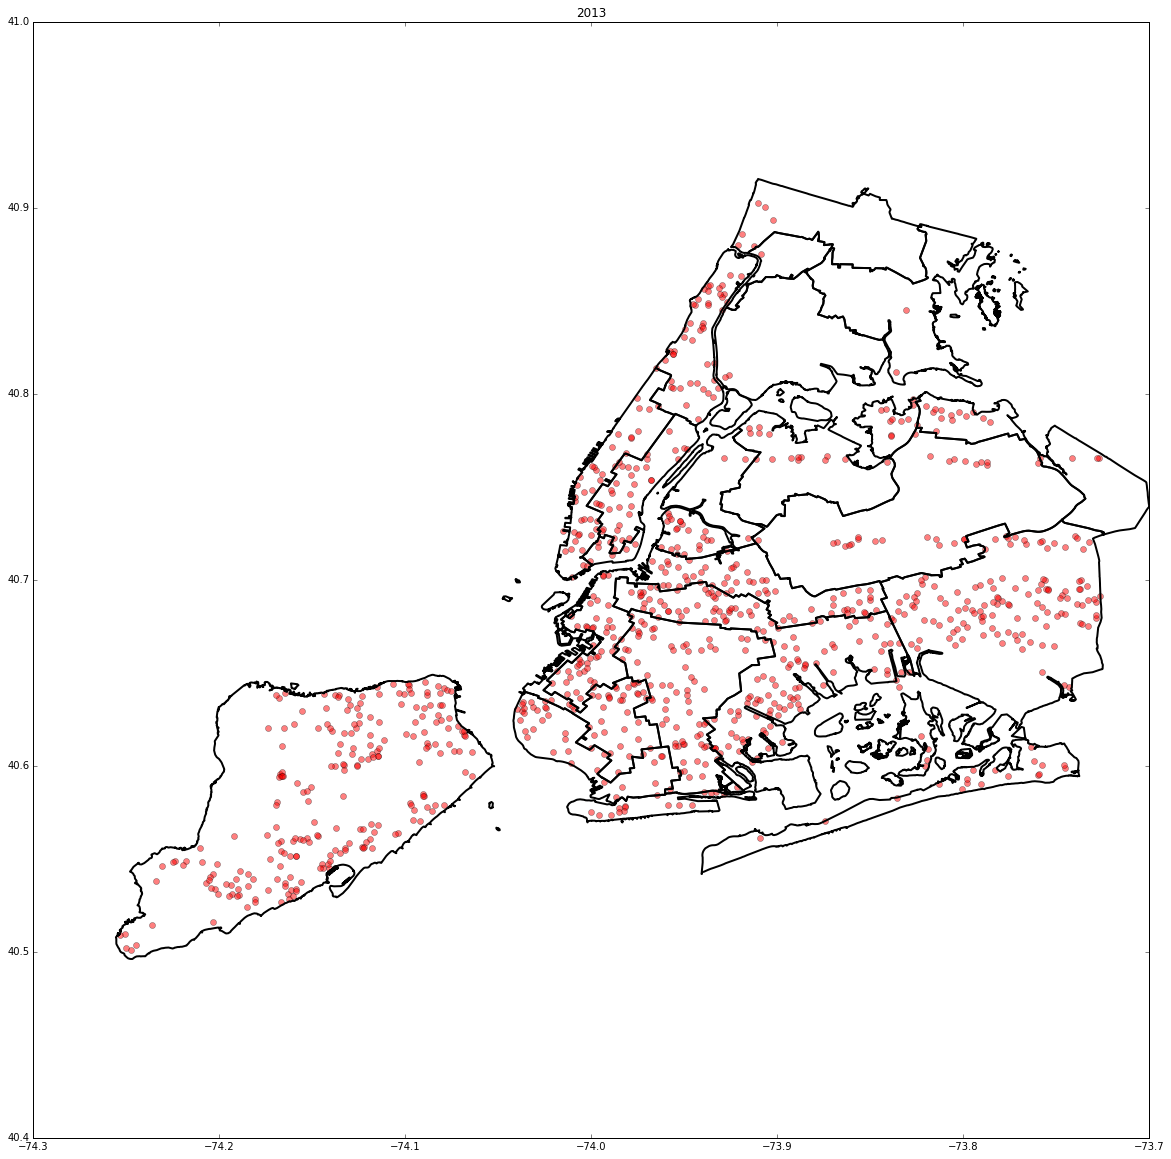

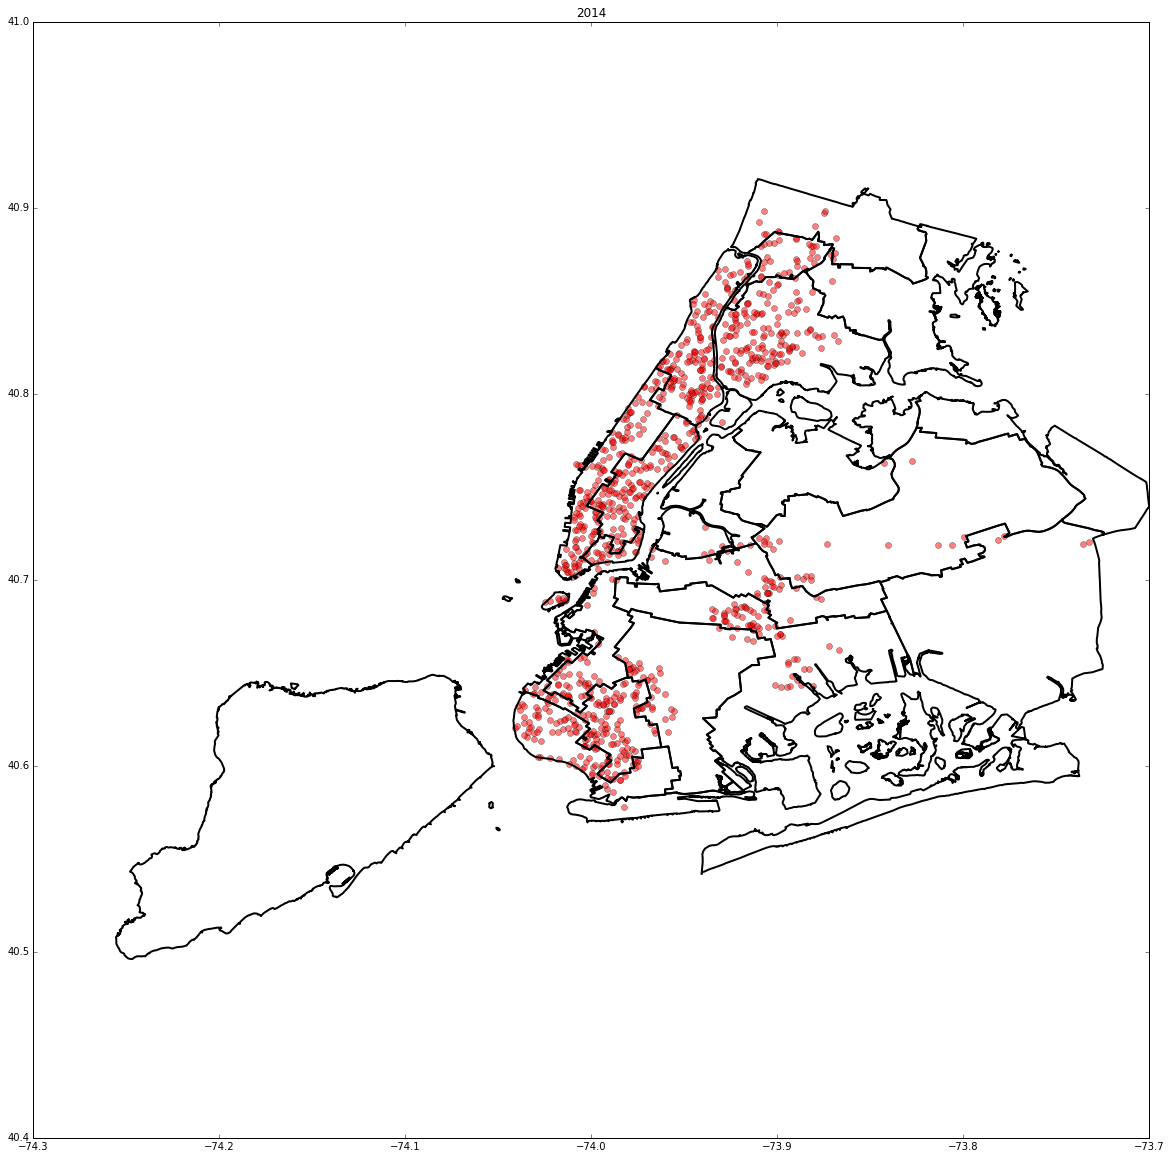

In [12]:
#Show maps of samples over time with district boundaries
import json 
import matplotlib.pyplot as plt
import numpy as np
import random

#First load zipcode boundaries
boundary_fname='/imagenetdb3/tgebru/cvpr2016/housing_shapefiles/\
nyc-district-tabulation-areas-polygons.geojson'

years=range(2007,2015)

for year in years:
    samples_fname=os.path.join(csv_load_dir,'timelapse_lat_lng_%d.txt')%year
    with open(boundary_fname) as json_file:
        json_data=json.load(json_file)

    x_list=[]
    y_list=[]
 
    #Plot train coordinates of lat/lngs
    plt.rcParams['figure.figsize']=(20,20)
    fig = plt.figure() 
    ax = fig.gca()

    #Randomly sample 1k points to plot
    NUM_SAMPLES=1000
    all_lines=open(samples_fname,'rb').readlines()
    if len(all_lines)> NUM_SAMPLES:
        latlong_samples=random.sample(all_lines,NUM_SAMPLES)
    else:
        latlong_samples=all_lines

    for l in latlong_samples:
        ax.plot(l.split('\t')[1].strip(),l.split('\t')[0].strip(),'ro',alpha=0.5)
        ax.set_title(year)

    for feat in json_data['features']:
        coords = feat['geometry']['coordinates'] 
        for c in coords:
            x_list.append([i for i,j in c[0]])
            y_list.append([j for i,j in c[0]])
    
    for x,y in zip(x_list,y_list):
        ax.plot(x,y,'k',linewidth=2.0)
    plt.savefig(os.path.join(img_save_dir,'im_samples_district_%d.png'%year))